In [23]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### Defining file references

In [2]:
performance_file = "Datasets/Task 1: Employee Performance Review/employee_scores.csv"
employee_info_file = "Datasets/Task 1: Employee Performance Review/employee_info.csv"

### # 1. Import the dataset from the CSV file into a Pandas DataFrame

In [11]:
try:
    df_performance = pd.read_csv(performance_file)
    print(f"Successfull imported '{performance_file}':")
    print(df_performance.head())
    print("-"*30)
    df_detailed_employee_info = pd.read_csv(employee_info_file)
    print(f"Successfull imported '{employee_info_file}':")
    print(df_detailed_employee_info.head())
    print("-"*30)
except FileNotFoundError as e:
    print(f"One of the files was not found: {e}")
except Exception as e:
    print(f"An unexpected error occured: {e}")

Successfull imported 'Datasets/Task 1: Employee Performance Review/employee_scores.csv':
  employee_id  score   department  years_of_service  last_promotion_year  \
0      EMP001     92        Sales                 5                 2022   
1      EMP002     78    Marketing                 3                 2023   
2      EMP003     65           HR                 7                 2021   
3      EMP004     88  Engineering                 4                 2023   
4      EMP005     50           HR                 2                 2024   

   feedback_score  training_hours_last_year  
0             4.5                        20  
1             3.8                        15  
2             2.5                        10  
3             4.2                        25  
4             2.0                         5  
------------------------------
Successfull imported 'Datasets/Task 1: Employee Performance Review/employee_info.csv':
  employee_id first_name last_name                  email ph

### # 2. Define performance thresholds

In [8]:
THRESHOLDS = {
    "Exceeds Expectations": 90,
    "Meets Expectations": 70,
    "Needs Improvement": 0
}

### # 3. Function to categorize performance

In [9]:
def categorize_performance(score):
    if score >= THRESHOLDS["Exceeds Expectations"]:
        return "Exceeds Expectations"
    elif score >= THRESHOLDS["Meets Expectations"]:
        return "Meets Expectations"
    else:
        return "Needs Improvement"

### # 4. Apply the categorization function to create a new 'category' column

In [17]:
df_performance['category'] = df_performance['score'].apply(categorize_performance)
df_employee_info = df_detailed_employee_info[["employee_id", "first_name", "last_name"]]
df_merged_employee_performance = pd.merge(df_performance,df_employee_info,on="employee_id",how="left")

df_merged_employee_performance["full_name"] = df_merged_employee_performance["first_name"].astype(str) + " " + df_merged_employee_performance["last_name"]

cols = df_merged_employee_performance.columns.to_list()
cols.remove('first_name')
cols.remove('last_name')
cols.remove('full_name')
employee_id_index = cols.index('employee_id')
cols.insert(employee_id_index + 1, 'full_name')

df_merged_employee_performance = df_merged_employee_performance[cols]
print(df_merged_employee_performance[["employee_id", "full_name","score", "category"]])

   employee_id        full_name  score              category
0       EMP001      Alice Smith     92  Exceeds Expectations
1       EMP002      Bob Johnson     78    Meets Expectations
2       EMP003    Charlie Brown     65     Needs Improvement
3       EMP004     Diana Miller     88    Meets Expectations
4       EMP005        Eve Davis     50     Needs Improvement
5       EMP006     Frank Garcia     95  Exceeds Expectations
6       EMP007  Grace Rodriguez     72    Meets Expectations
7       EMP008   Harry Martinez     81    Meets Expectations
8       EMP009    Ivy Hernandez     60     Needs Improvement
9       EMP010       Jack Lopez     75    Meets Expectations
10      EMP011   Karen Gonzalez     90  Exceeds Expectations
11      EMP012      Liam Wilson     68     Needs Improvement
12      EMP013     Mia Anderson     70    Meets Expectations
13      EMP014      Noah Thomas     55     Needs Improvement
14      EMP015   Olivia Jackson     85    Meets Expectations
15      EMP016      Pete

In [22]:
pivot_table_category_wise_count = pd.pivot_table(
    df_merged_employee_performance,
    index = ["department"],
    columns= "category",
    values = "employee_id",
    aggfunc= "count",
    fill_value=0
)

print(pivot_table_category_wise_count)

category     Exceeds Expectations  Meets Expectations  Needs Improvement
department                                                              
Engineering                     1                   4                  0
HR                              0                   2                  3
Marketing                       0                   2                  2
Sales                           3                   1                  2


## Plotting the Chart

Pandas DataFrames have a built-in `.plot()` method that leverages Matplotlib, making it incredibly convenient to generate charts directly from your data.

```python

<Figure size 1200x700 with 0 Axes>

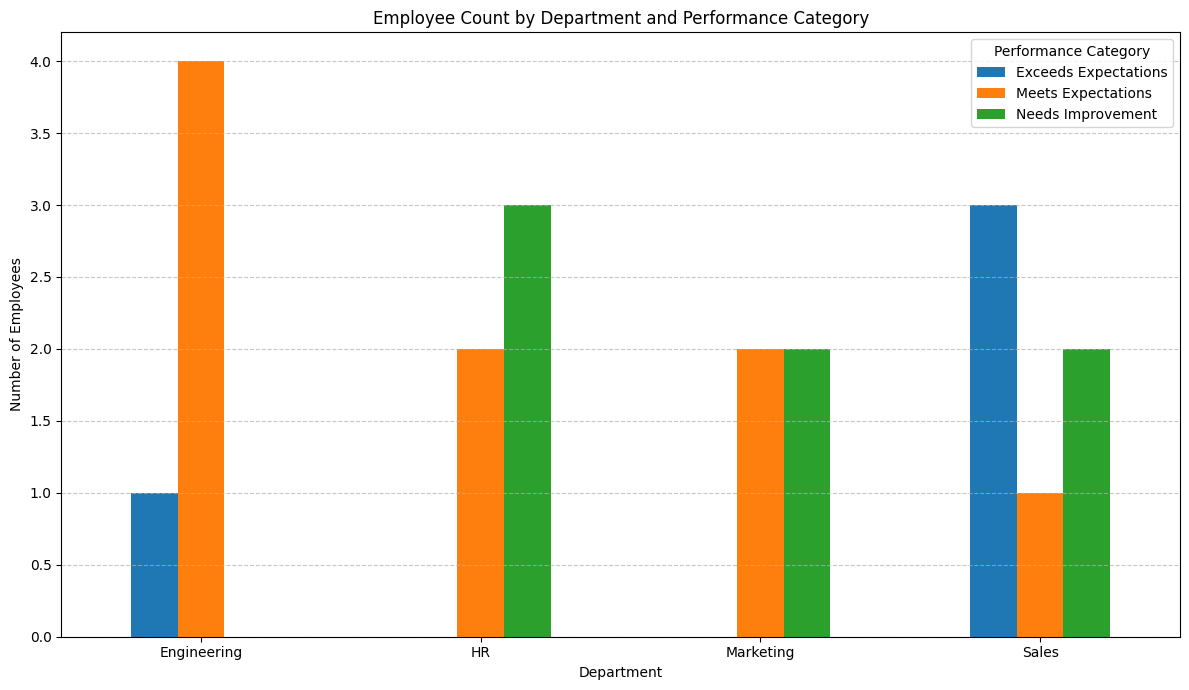

In [51]:
plt.figure(figsize=(12,7))
pivot_table_category_wise_count.plot(kind="bar", figsize=(12,7))
plt.title('Employee Count by Department and Performance Category')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Performance Category')
plt.xticks(rotation=0, ha='center')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()